In [1]:
import matplotlib.image as img 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

height : 512 width : 384


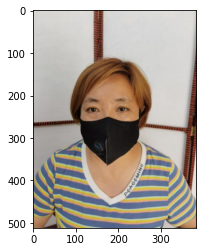

In [2]:
# 384 * 512
vanila_image = plt.imread("/opt/ml/input/data/train/images/000001_female_Asian_45/mask1.jpg")
# 이미지 사이즈 확인
height = vanila_image.shape[0]
width = vanila_image.shape[1] 
print('height :', height, 'width :', width)
plt.imshow(vanila_image)
plt.show()

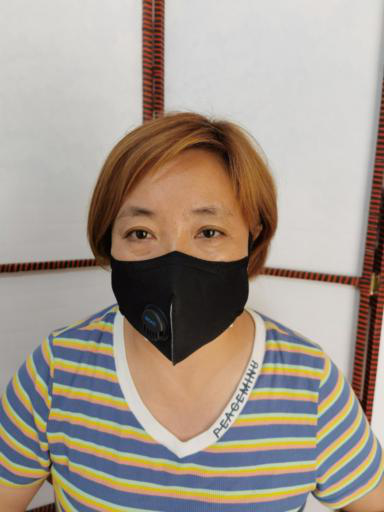

In [228]:
Image.open("/opt/ml/input/data/train/images/000001_female_Asian_45/mask1.jpg")

## 실험 1 : 배경제거 (점수 : )

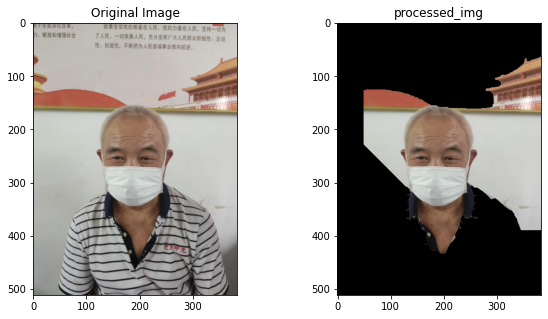

In [232]:
# vanila_image = plt.imread('/opt/ml/input/data/train/images/000001_female_Asian_45/mask1.jpg')
vanila_image = plt.imread('/opt/ml/input/data/train/images/003706_male_Asian_60/mask3.jpg')

# 마스크 토대가 되는 배열 생성
mask = np.zeros(vanila_image.shape[:2], np.uint8)

# 내부 알고리즘에 사용하는 사이즈가 (1,65)의np.float64형 배열 생성
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# 전경 이미지를 감싸는 단형영역을 지정해서 GrabCut로 전경 이미지 추출
rect = (50,50,512,384)
cv2.grabCut(vanila_image, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)

# 업데이트된 마스크를 이용해서 최종적인 마스크 생성
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# 입력 이미지와 합성 후 표시
processed_img = vanila_image*mask2[:, :, np.newaxis]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(vanila_image)
ax[0].set_title('Original Image')
ax[1].imshow(processed_img)
ax[1].set_title('processed_img');

## 실험1-1 - 배경제거 + 얼굴크롭 (점수 : )

In [4]:
# 배경 먼저 지우고 그다음에 얼굴 크롭도 해봐야할듯!!!


# Of course, the point is to use it on lots of files. Let's load some.
from glob import glob

def plot_test_images(faces, cropper):
    """Given a list on filepaths, crops and plots them."""
    for face in faces:
        try:
            img_array = c.crop(face)
        except (AttributeError, TypeError):
            pass
        if img_array is not None:
            # We're using matplotlib here as it's easier to use in notebook
            plt.imshow(img_array)
            plt.show()
            
            
faces = [f for f in glob("/opt/ml/input/data/train/images/003706_male_Asian_60/*") if not f.endswith("md")]

print(f"{len(faces)} images to test with.")

for face in faces :
    vanila_image = plt.imread(face)
    # 마스크 토대가 되는 배열 생성
    mask = np.zeros(vanila_image.shape[:2], np.uint8)

    # 내부 알고리즘에 사용하는 사이즈가 (1,65)의np.float64형 배열 생성
    bgdModel = np.zeros((1,65), np.float64)
    fgdModel = np.zeros((1,65), np.float64)

    # 전경 이미지를 감싸는 단형영역을 지정해서 GrabCut로 전경 이미지 추출
    rect = (0,0,384,512)
    cv2.grabCut(vanila_image, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)

    # 업데이트된 마스크를 이용해서 최종적인 마스크 생성
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

    # 입력 이미지와 합성 후 표시
    processed_img = vanila_image*mask2[:, :, np.newaxis]
    
    plt.imshow(processed_img)
    plt.show()
    
#     c = Cropper(height=224, width=224, face_percent=80)
#     plot_test_images(faces, c)





7 images to test with.


error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/grabcut.cpp:386: error: (-215:Assertion failed) !bgdSamples.empty() && !fgdSamples.empty() in function 'initGMMs'


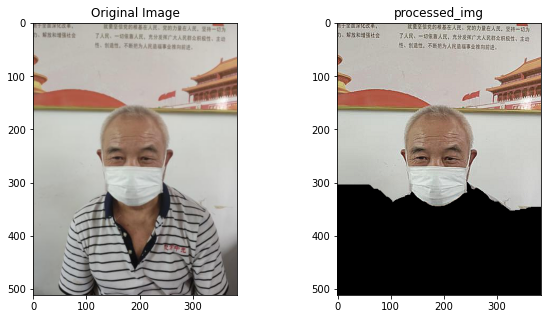

In [4]:
loc = '/opt/ml/input/data/train/images/003706_male_Asian_60/mask3.jpg'

# vanila_image = Image.open(loc)

vanila_image = plt.imread('/opt/ml/input/data/train/images/003706_male_Asian_60/mask3.jpg')

# 커널 생성(대상이 있는 픽셀을 강조)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# 커널 적용 
image_sharp = cv2.filter2D(vanila_image, -1, kernel)

# 마스크 토대가 되는 배열 생성
mask = np.zeros(vanila_image.shape[:2], np.uint8)

# 내부 알고리즘에 사용하는 사이즈가 (1,65)의np.float64형 배열 생성
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# 전경 이미지를 감싸는 단형영역을 지정해서 GrabCut로 전경 이미지 추출
rect = (0,0,512,384)
cv2.grabCut(image_sharp, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)

# 업데이트된 마스크를 이용해서 최종적인 마스크 생성
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# 입력 이미지와 합성 후 표시
sharp_processed_img = image_sharp*mask2[:, :, np.newaxis]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(vanila_image)
ax[0].set_title('Original Image')
ax[1].imshow(sharp_processed_img)
ax[1].set_title('processed_img');

## 실험1-2 - 이미지선명 + 배경제거 (점수 : )

In [35]:
# 이미지를 선명하게 한 뒤에 배경을 제거해보자!

vanila_image = plt.imread('/opt/ml/input/data/train/images/003706_male_Asian_60/mask3.jpg')

# 커널 생성(대상이 있는 픽셀을 강조)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# 커널 적용 
image_sharp = cv2.filter2D(img, -1, kernel)

# 마스크 토대가 되는 배열 생성
mask = np.zeros(vanila_image.shape[:2], np.uint8)

# 내부 알고리즘에 사용하는 사이즈가 (1,65)의np.float64형 배열 생성
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# 전경 이미지를 감싸는 단형영역을 지정해서 GrabCut로 전경 이미지 추출
rect = (50,50,512,384)
cv2.grabCut(image_sharp, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)

# 업데이트된 마스크를 이용해서 최종적인 마스크 생성
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# 입력 이미지와 합성 후 표시
sharp_processed_img = image_sharp*mask2[:, :, np.newaxis]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(vanila_image)
ax[0].set_title('Original Image')
ax[1].imshow(sharp_processed_img)
ax[1].set_title('processed_img');

TypeError: Expected Ptr<cv::UMat> for argument 'src'

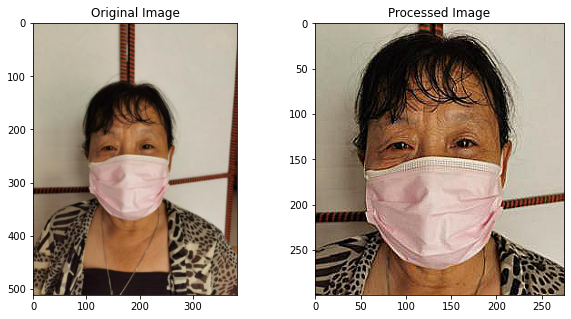

In [303]:
# loc = '/opt/ml/input/data/train/images/003706_male_Asian_60/normal.jpg'
# loc = '/opt/ml/input/data/train/images/006108_male_Asian_19/mask1.jpg'
# loc = "/opt/ml/input/data/train/images/000001_female_Asian_45/mask2.jpg"
loc = '/opt/ml/input/data/train/images/000009_female_Asian_56/mask4.jpg'

test_img = Image.open(loc)
# 가로시작점, 세로시작점, 가로범위, 세로범위
area = (50,100,325,400)


precropped_img = test_img.crop(area)

cropped_img = np.array(precropped_img, dtype='uint8')

kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# 커널 적용 
image_sharp = cv2.filter2D(cropped_img, -1, kernel)



fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(test_img)
ax[0].set_title('Original Image')
ax[1].imshow(image_sharp)
ax[1].set_title('Processed Image');

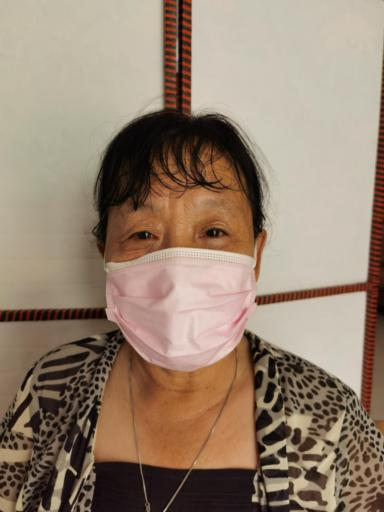

In [98]:
loc = '/opt/ml/input/data/train/images/000009_female_Asian_56/mask4.jpg'

test_img = Image.open(loc)

test_img

## 실험1-3 - 배경제거 + 얼굴크롭 + 이미지 선명 (점수 : )

None
수정


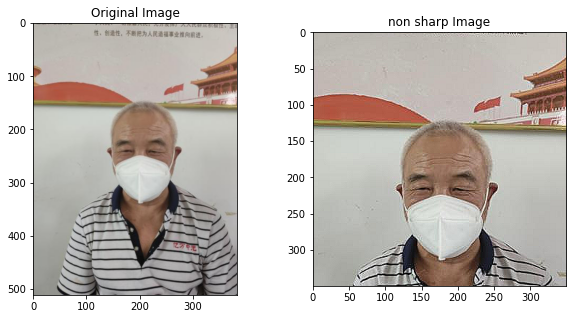

In [41]:
# 일단 얼굴 크롭하고, 선명하게 한 뒤 배경을 제거한다!!
image_path = '/opt/ml/input/data/train/images/003706_male_Asian_60/mask1.jpg'
# image_path = '/opt/ml/input/data/train/images/006108_male_Asian_19/mask2.jpg'
# image_path = "/opt/ml/input/data/train/images/000001_female_Asian_45/mask1.jpg"
from autocrop import Cropper
vanila_image = plt.imread(image_path)


c = Cropper(face_percent=60)
cropped_img_array = c.crop(image_path)

print(cropped_img_array)
# 얼굴크롭이 안되는 경우

if str(cropped_img_array) == 'None' :
    non_cropped_img = Image.open(image_path)
    # 가로시작점, 세로시작점, 가로범위, 세로범위
    area = (25, 25, 375, 375)
    cropped_img = non_cropped_img.crop(area)
    cropped_img_array = np.array(cropped_img, dtype='uint8')
    print('수정')

    
#########################################################################################
# 이미지로 받아오면 선명하게 한다.
# 커널 생성(대상이 있는 픽셀을 강조)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# 커널 적용 
try :
    image_sharp = cv2.filter2D(cropped_img_array, -1, kernel)
#     print('shap processed')
except:
    image_sharp = cropped_img_array

# ##########################################################################################
# # 선명하게 한 것에 배경을 삭제한다.
# # 마스크 토대가 되는 배열 생성
# mask = np.zeros(image_sharp.shape[:2], np.uint8)

# # 내부 알고리즘에 사용하는 사이즈가 (1,65)의np.float64형 배열 생성
# bgdModel = np.zeros((1,65), np.float64)
# fgdModel = np.zeros((1,65), np.float64)

# # 전경 이미지를 감싸는 단형영역을 지정해서 GrabCut로 전경 이미지 추출

# # 가로시작점, 세로시작점, 가로범위, 세로범위
# rect = (0,0,384,512)
# cv2.grabCut(image_sharp, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)

# # 업데이트된 마스크를 이용해서 최종적인 마스크 생성
# mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# # 입력 이미지와 합성 후 표시
# sharp_processed_img = image_sharp*mask2[:, :, np.newaxis]

# ##########################################################################################

# Image.fromarray(image_sharp)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(vanila_image)
ax[0].set_title('Original Image')
ax[1].imshow(Image.fromarray(image_sharp))
ax[1].set_title('non sharp Image');


## 실험2 - 얼굴크롭 (점수 : )

얼굴을 인식하지 못해서 None이 반환되는 경우가 있다!!
mask1

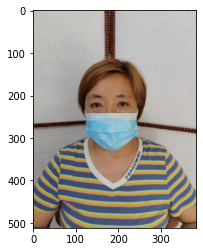

In [111]:
%matplotlib inline
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import PIL


sys.path.insert(0, Path.cwd().parent)

from autocrop import Cropper

# Thumbnail of the original file
loc = '/opt/ml/input/data/train/images/000001_female_Asian_45/mask2.jpg'
plt.imshow(plt.imread(loc), cmap='Greys_r')

<class 'numpy.ndarray'>


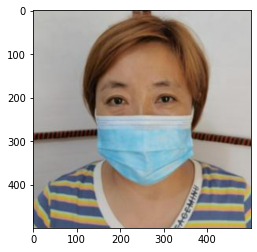

In [206]:
# We can also show the array from Matplotlib
c = Cropper(face_percent=60)
img_array = c.crop(loc)
print(type(img_array))
plt.imshow(img_array)
plt.show()

7 images to test with.


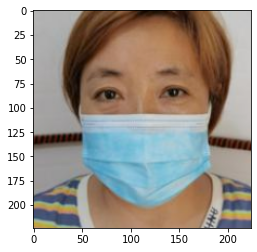

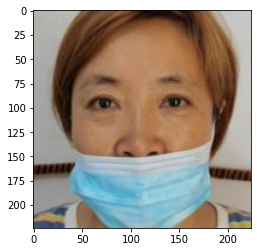

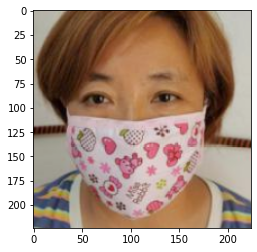

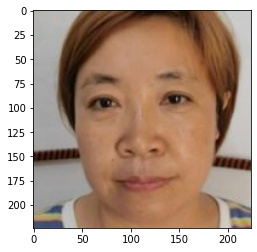

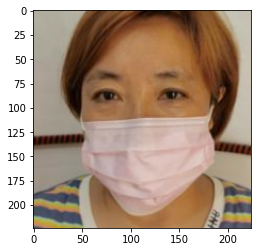

In [152]:
# Of course, the point is to use it on lots of files. Let's load some.
from glob import glob

faces = [f for f in glob("/opt/ml/input/data/train/images/000001_female_Asian_45/*") if not f.endswith("md")]
print(f"{len(faces)} images to test with.")

def plot_test_images(faces, cropper):
    """Given a list on filepaths, crops and plots them."""
    for face in faces:
        try:
            img_array = c.crop(face)
        except (AttributeError, TypeError):
            pass
        if img_array is not None:
            # We're using matplotlib here as it's easier to use in notebook
            plt.imshow(img_array)
            plt.show()
            
c = Cropper(height=224, width=224, face_percent=80)
plot_test_images(faces, c)
            

## 실험2-1 - 얼굴크롭 + 이미지 선명 (점수 : )

이미지가 선명해지면 오히려 얼굴 크롭을 잘 못찾는 듯 하다.

따라서 얼굴을 먼저 찾은 뒤 이미지를 선명하게 하자!!

14


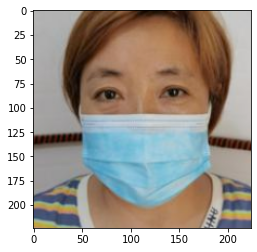

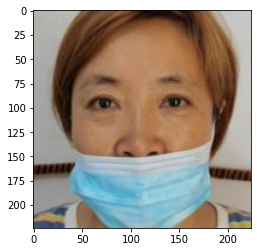

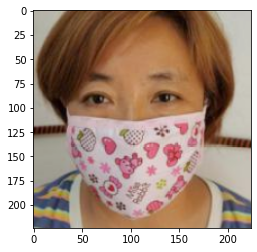

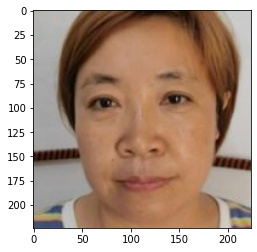

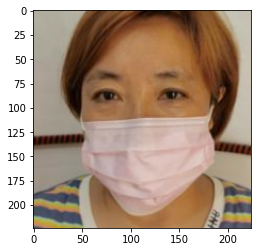

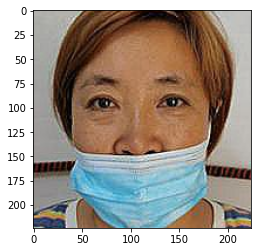

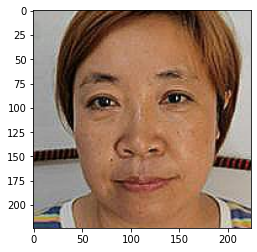

In [205]:
# 이미지를 선명하게 한 뒤에 얼굴을 크롭해보자!
# 이미지를 선명하게 처리한 뒤 저장하고, 저장한 파일을 끄집어서 얼굴 크롭해야할 듯
from PIL import Image


vanila_image = plt.imread('/opt/ml/input/data/train/images/000001_female_Asian_45/mask2.jpg')


vanila_list = [f for f in glob("/opt/ml/input/data/train/images/000001_female_Asian_45/*") if not f.endswith("md")]
loc = '/opt/ml/input/data/train/images/000001_female_Asian_45/mask2.jpg'

# 커널 생성(대상이 있는 픽셀을 강조)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

for vanila in vanila_list :
    filepath = vanila.split('.')[:-1]
    # 커널 적용 
    image_sharp = cv2.filter2D(plt.imread(vanila), -1, kernel)
    plt.imsave(f"{filepath[0]}_sharp.jpg",image_sharp)
#########################################################################################
# 선명하게 한 뒤에 crop 할 수 있게 전달을 잘해야할 듯...??

c = Cropper(height=224, width=224, face_percent=80)


sharp_list = [f for f in glob("/opt/ml/input/data/train/images/000001_female_Asian_45/*") if not f.endswith("md")]

print(len(sharp_list))
plot_test_images(sharp_list, c)



## 실험3 - 이미지 선명 (점수 : )

이미지를 선명하게 하면 주름이 더 잘보이는것 같기도??

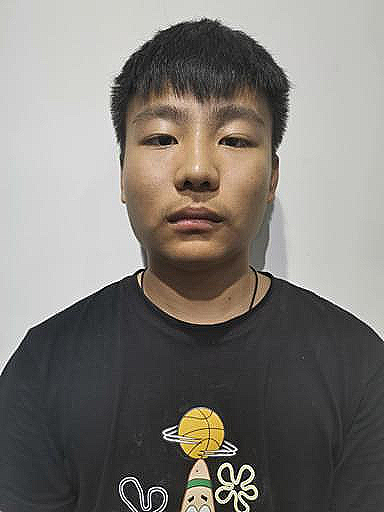

In [49]:



image_path = '/opt/ml/input/data/train/images/003706_male_Asian_60/mask1.jpg'
# image_path = '/opt/ml/input/data/train/images/006108_male_Asian_19/mask2.jpg'
# image_path = "/opt/ml/input/data/train/images/000001_female_Asian_45/mask1.jpg"


vanila_image = plt.imread('/opt/ml/input/data/train/images/006108_male_Asian_19/normal.jpg')

# 커널 생성(대상이 있는 픽셀을 강조)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# 커널 적용 
image_sharp = cv2.filter2D(vanila_image, -1, kernel)

cropped_image = Image.fromarray(image_sharp)
cropped_image
# fig, ax = plt.subplots(1,2, figsize=(10,5))
# ax[0].imshow(vanila_image)
# ax[0].set_title('Original Image')
# ax[1].imshow(image_sharp)
# ax[1].set_title('Sharp Image');

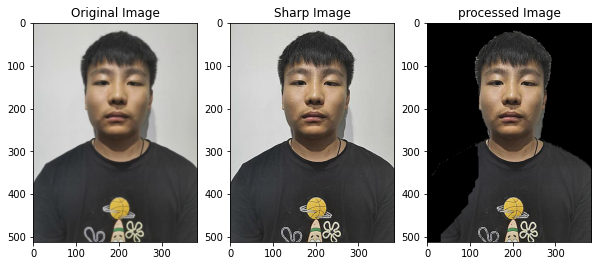

In [66]:
image_path = '/opt/ml/input/data/train/images/003706_male_Asian_60/mask1.jpg'
# image_path = '/opt/ml/input/data/train/images/006108_male_Asian_19/mask2.jpg'
# image_path = "/opt/ml/input/data/train/images/000001_female_Asian_45/mask1.jpg"



for i in range(1,6):
    

vanila_image = plt.imread('/opt/ml/input/data/train/images/006108_male_Asian_19/normal.jpg')
# 커널 생성(대상이 있는 픽셀을 강조)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
# 커널 적용 
image_sharp = cv2.filter2D(vanila_image, -1, kernel)

# 이미지 표시용
sharp_image = Image.fromarray(image_sharp)

##########################################################################################
# 선명하게 한 것에 배경을 삭제한다.
# 마스크 토대가 되는 배열 생성
mask = np.zeros(image_sharp.shape[:2], np.uint8)

# 내부 알고리즘에 사용하는 사이즈가 (1,65)의np.float64형 배열 생성
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# 전경 이미지를 감싸는 단형영역을 지정해서 GrabCut로 전경 이미지 추출

# 가로시작점, 세로시작점, 가로범위, 세로범위
rect = (10,10,384,512)
cv2.grabCut(image_sharp, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)

# 업데이트된 마스크를 이용해서 최종적인 마스크 생성
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# 입력 이미지와 합성 후 표시
processed_img = image_sharp*mask2[:, :, np.newaxis]

##########################################################################################

fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].imshow(vanila_image)
ax[0].set_title('Original Image')
ax[1].imshow(sharp_image)
ax[1].set_title('Sharp Image')
ax[2].imshow(processed_img)
ax[2].set_title('processed Image');

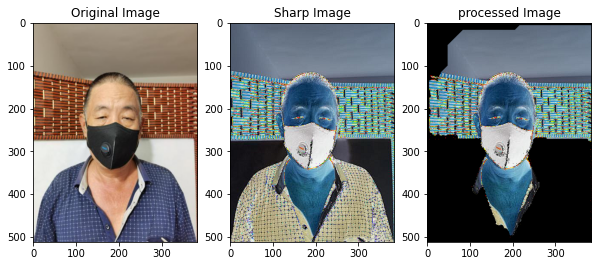

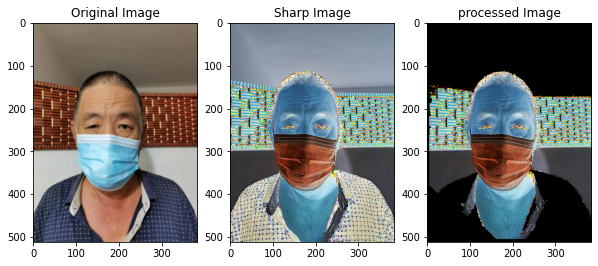

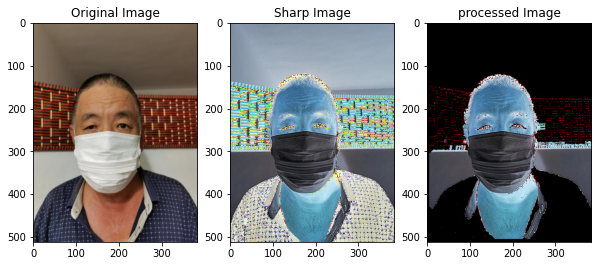

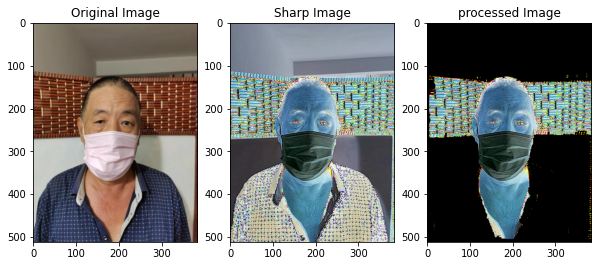

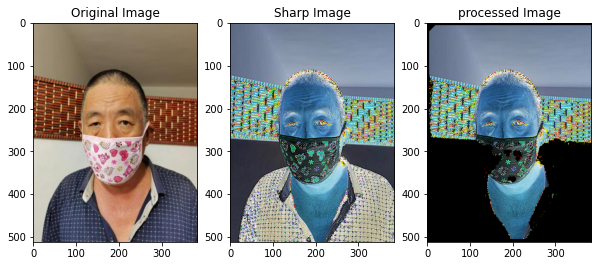

In [87]:
for i in range(1,6):
    vanila_image = plt.imread(f'/opt/ml/input/data/train/images/000033_male_Asian_57/mask{i}.jpg')
    
    # 커널 생성(대상이 있는 픽셀을 강조)
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    # 커널 적용 
    image_sharp = cv2.filter2D(vanila_image, -1, kernel)

    # 이미지 표시용
    sharp_image = Image.fromarray((image_sharp * 255).astype(np.uint8))
    
    image_sharp = (image_sharp * 255).astype(np.uint8)
    ##########################################################################################
    # 선명하게 한 것에 배경을 삭제한다.
    # 마스크 토대가 되는 배열 생성
    mask = np.zeros(image_sharp.shape[:2], np.uint8)

    # 내부 알고리즘에 사용하는 사이즈가 (1,65)의np.float64형 배열 생성
    bgdModel = np.zeros((1,65), np.float64)
    fgdModel = np.zeros((1,65), np.float64)

    # 전경 이미지를 감싸는 단형영역을 지정해서 GrabCut로 전경 이미지 추출

    # 가로시작점, 세로시작점, 가로범위, 세로범위
    rect = (5,5,380,500)
    cv2.grabCut(image_sharp, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)

    # 업데이트된 마스크를 이용해서 최종적인 마스크 생성
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

    # 입력 이미지와 합성 후 표시
    processed_img = image_sharp*mask2[:, :, np.newaxis]
    
    
    
    
    ##########################################################################################
    fig, ax = plt.subplots(1,3, figsize=(10,5))
    ax[0].imshow(vanila_image)
    ax[0].set_title('Original Image')
    ax[1].imshow(sharp_image)
    ax[1].set_title('Sharp Image')
    ax[2].imshow(processed_img)
    ax[2].set_title('processed Image');

<class 'numpy.ndarray'>


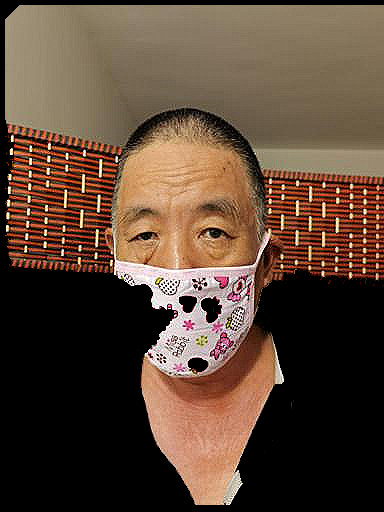

In [96]:
print(type(processed_img))

test2 = (Image.fromarray(processed_img*255))
test2